In [2]:
%pwd

'd:\\Projects\\CA-1\\MLA'

In [3]:
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#remove rows with missing values
test_df = test_df[test_df["text"].notna()]
print("Test NaN:", test_df["text"].isna().sum())

Test NaN: 0


In [12]:
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

print("Train NaN:", train_df["text"].isna().sum())
print("Val NaN:", val_df["text"].isna().sum())
print("Test NaN:", test_df["text"].isna().sum())

print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train NaN: 0
Val NaN: 0
Test NaN: 0
Train shape: (31232, 4)
Val shape: (5205, 4)
Test shape: (5205, 4)


In [13]:
train_df.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [14]:
#preparing data for model training
X_train_text = train_df["text"].astype(str)
X_val_text   = val_df["text"].astype(str)
X_test_text  = test_df["text"].astype(str)

y_train = train_df["label"]
y_val   = val_df["label"]
y_test  = test_df["label"]

print("X_train_text shape:", X_train_text.shape)
print("X_val_text shape:  ", X_val_text.shape)
print("X_test_text shape: ", X_test_text.shape)
print("y_train shape:     ", y_train.shape)
print("y_val shape:       ", y_val.shape)
print("y_test shape:      ", y_test.shape)

X_train_text shape: (31232,)
X_val_text shape:   (5205,)
X_test_text shape:  (5205,)
y_train shape:      (31232,)
y_val shape:        (5205,)
y_test shape:       (5205,)


In [15]:
X_train_text.isna().sum(), X_val_text.isna().sum(), X_test_text.isna().sum()

(np.int64(0), np.int64(0), np.int64(0))

In [16]:
#convert text data into numerical features using the TF-IDF method.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    max_df=0.9,
    lowercase=True,
    stop_words="english"
)

X_train = vectorizer.fit_transform(X_train_text)
X_val   = vectorizer.transform(X_val_text)
X_test  = vectorizer.transform(X_test_text)

print("X_train shape:", X_train.shape)
print("X_val shape:  ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape: (31232, 5000)
X_val shape:   (5205, 5000)
X_test shape:  (5205, 5000)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_val)

print("Validation accuracy (Logistic Regression):", accuracy_score(y_val, y_pred))

d:\Projects\CA-1\MLA\mla\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Validation accuracy (Logistic Regression): 0.6664745437079731


In [18]:
y_test_pred = lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy (Logistic Regression):", test_accuracy)

Test Accuracy (Logistic Regression): 0.6662824207492796


In [19]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        y_test_pred,
        target_names=["Negative", "Neutral", "Positive"]
    )
)


              precision    recall  f1-score   support

    Negative       0.70      0.60      0.64      1546
     Neutral       0.59      0.68      0.63      1929
    Positive       0.75      0.71      0.73      1730

    accuracy                           0.67      5205
   macro avg       0.68      0.66      0.67      5205
weighted avg       0.67      0.67      0.67      5205



In [20]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=100,
    random_state=42
)

mlp_model.fit(X_train, y_train)

y_val_pred_mlp = mlp_model.predict(X_val)

val_accuracy_mlp = accuracy_score(y_val, y_val_pred_mlp)
print("Validation Accuracy (ANN):", val_accuracy_mlp)

Validation Accuracy (ANN): 0.6265129682997118


d:\Projects\CA-1\MLA\mla\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
y_test_pred_mlp = mlp_model.predict(X_test)

test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
print("Test Accuracy (ANN):", test_accuracy_mlp)

Test Accuracy (ANN): 0.6284341978866474


In [22]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        y_test_pred_mlp,
        target_names=["Negative", "Neutral", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.63      0.60      0.61      1546
     Neutral       0.56      0.62      0.59      1929
    Positive       0.72      0.67      0.69      1730

    accuracy                           0.63      5205
   macro avg       0.64      0.63      0.63      5205
weighted avg       0.63      0.63      0.63      5205



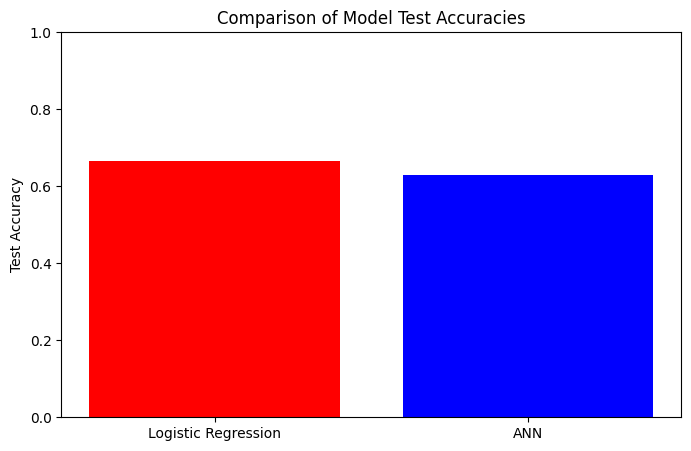

In [23]:
#comapre LR vs ANN accuracy results graph
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'ANN']
accuracies = [test_accuracy, test_accuracy_mlp]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['red', 'blue'])
plt.ylim(0.0, 1.0)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.show()

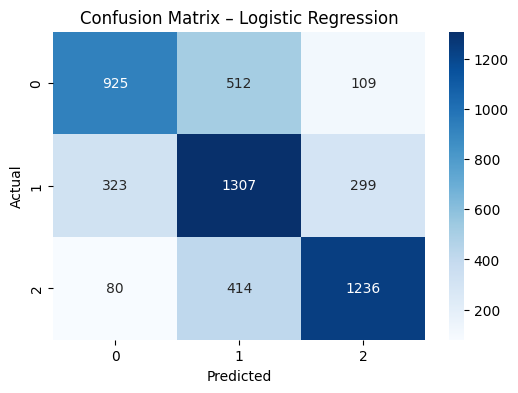

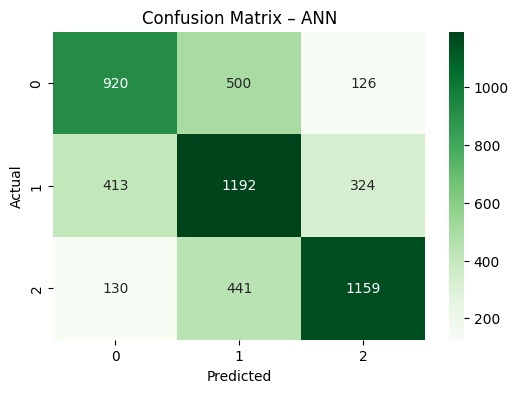

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_test_pred)
cm_mlp = confusion_matrix(y_test, y_test_pred_mlp)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – ANN(MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


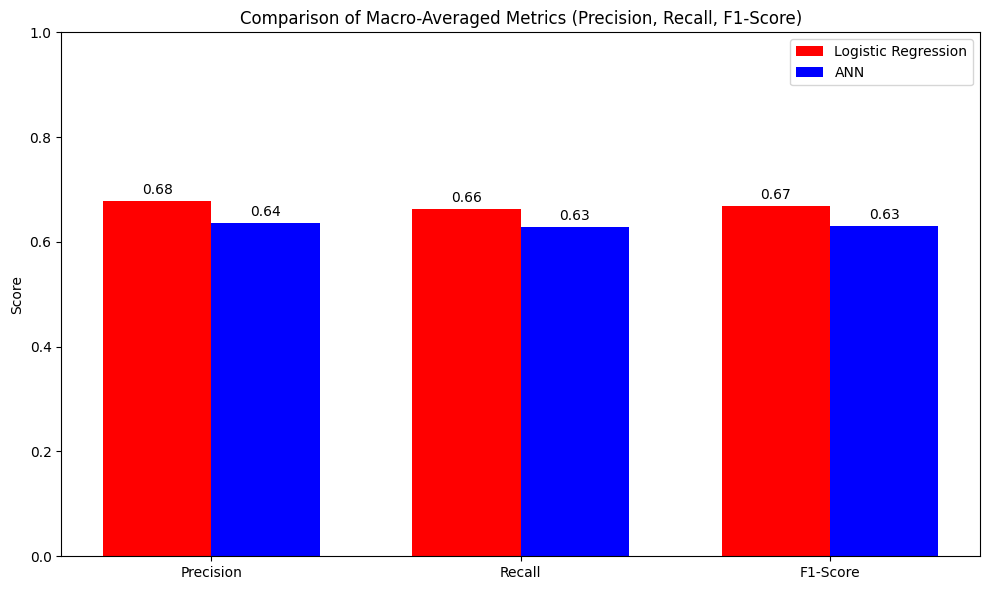

In [34]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate macro-averaged metrics for Logistic Regression
precision_lr = precision_score(y_test, y_test_pred, average='macro')
recall_lr = recall_score(y_test, y_test_pred, average='macro')
f1_lr = f1_score(y_test, y_test_pred, average='macro')

# Calculate macro-averaged metrics for ANN
precision_mlp = precision_score(y_test, y_test_pred_mlp, average='macro')
recall_mlp = recall_score(y_test, y_test_pred_mlp, average='macro')
f1_mlp = f1_score(y_test, y_test_pred_mlp, average='macro')

metrics_labels = ['Precision', 'Recall', 'F1-Score']
lr_metrics = [precision_lr, recall_lr, f1_lr]
mlp_metrics = [precision_mlp, recall_mlp, f1_mlp]

x = np.arange(len(metrics_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_metrics, width, label='Logistic Regression', color='red')
rects2 = ax.bar(x + width/2, mlp_metrics, width, label='ANN', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Macro-Averaged Metrics (Precision, Recall, F1-Score)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.set_ylim(0.0, 1.0)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()
plt.show()

In [33]:
user_text = input("Enter a sentence to analyze sentiment: ")

user_text_tfidf = vectorizer.transform([user_text])

label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

#asked question
print(f"\nSentiment Analysis Results for: \"{user_text}\"")

# Get probability scores for Logistic Regression
pred_proba_lr = lr_model.predict_proba(user_text_tfidf)[0]
print("Logistic Regression Probabilities:")
for i, prob in enumerate(pred_proba_lr):
    print(f"  {label_map[i]}: {prob:.4f}")
# Add the final predicted class for Logistic Regression
lr_predicted_class_index = pred_proba_lr.argmax()
print(f"Final Answer (LR): {label_map[lr_predicted_class_index]}")

# Get probability scores for ANN (MLP)
pred_proba_mlp = mlp_model.predict_proba(user_text_tfidf)[0]
print("\nANN (MLP) Probabilities:")
for i, prob in enumerate(pred_proba_mlp):
    print(f"  {label_map[i]}: {prob:.4f}")
# Add the final predicted class for ANN
mlp_predicted_class_index = pred_proba_mlp.argmax()
print(f"Final Answer (ANN): {label_map[mlp_predicted_class_index]}")


Sentiment Analysis Results for: "Ram is not good not bad"
Logistic Regression Probabilities:
  Negative: 0.6367
  Neutral: 0.1835
  Positive: 0.1798
Final Answer (LR): Negative

ANN (MLP) Probabilities:
  Negative: 0.9403
  Neutral: 0.0434
  Positive: 0.0164
Final Answer (ANN): Negative


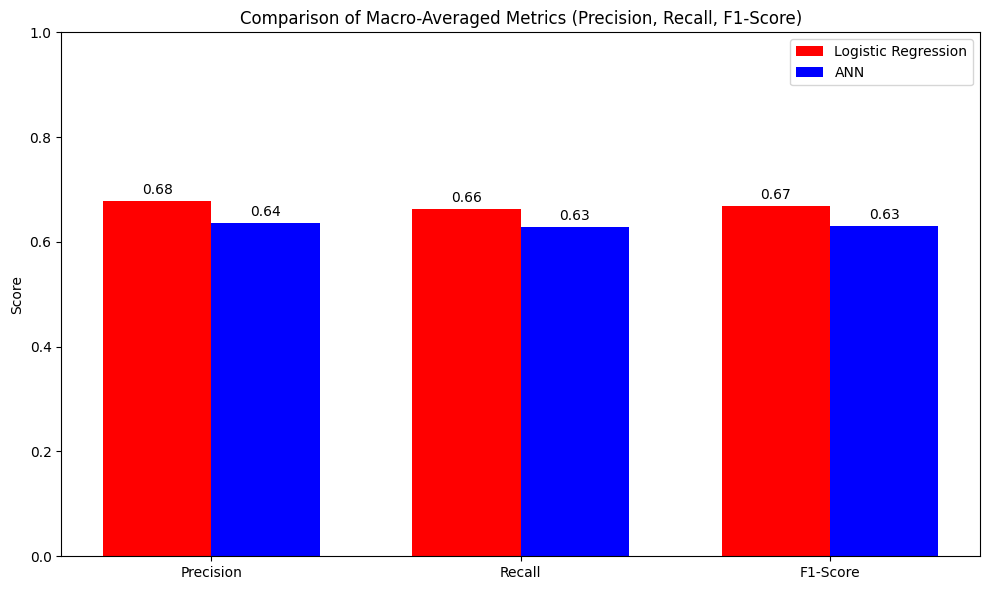